In [28]:
# 동적 프로그래밍은 난이도가 낮은 데에서도 많이 나오고 높은 데에서도 많이 나옴

# acmicpc.net/problem/1904

def fn(m):
    memo = [0 for i in range(m+1)]
    for i in range(m+1):
        if i==0:
            memo[i] = 0
        elif i==1:
            memo[i] = 1
        elif i==2:
            memo[i] = 2
        else:
            memo[i] = memo[i-1]+memo[i-2]
    return memo[m]
    
print(fn(int(input()))%15746)

100000
1979


In [21]:
m = int(input())

memo = [0 for i in range(m+1)]
for i in range(m+1):
    if i==0:
        memo[i] = 0
    elif i==1:
        memo[i] = 1
    elif i==2:
        memo[i] = 2
    else:
        memo[i] = 2*memo[i-1]-1
        
print(memo[m])

4
5


In [23]:
def fn(m):
    if m==0:
        return 0
    elif m==1:
        return 1
    elif m==2:
        return 2
    else:
        return 2*fn(m-1)-1
    
m = int(input())

print(fn(m))

# 메모이제이션으로 풀면 메모리 초과고
# 재귀로 풀면 런터임 에러네 -> maximum recursion depth exceeded in comparison 
# 재귀 스택 오버되는 에러

# 음 일단 문제 답이 15746으로 나눈 나머지를 구하는 거네 
# 자바로는 풀었었는데....

1000000


RecursionError: maximum recursion depth exceeded in comparison

In [30]:
# 선생님

# 동적 프로그램의 기본은 '한번 구한 값은 다시 구하지 않는다.'
# 이거임.

# 일단 이 문제는 n이 1,000,000까지 가니까 O(n) 정도로 풀면 됨. 

# 이 문젠 동적 프로그램 중에서 가장 쉬운편

# 문제는 메모이제이션으로 풀면됨 -> ok 여기까지 맞지

# 동적 프로그램의 특징은 n이 작을땐 손으로 구할 수 있음.

# 동적 프로그램은 점화식을 잘 세워야 함. 앞에서 구했던 값들을 어떻게 잘 조합해서
# 다음 값을 구하는거임.

# 길이가 i인 수열을 구하는 방법은
# 끝에 1을 넣고 i-1가지의 경우의수, 끝에 00을 넣고 i-2 가지의 경우
# 이 두가지가 전부임. 
# 그냥 피보나치 수열 문제임

n = int(input())

dp = [0]*1000001
dp[1] = 1
dp[2] = 2

for i in range(3, n+1):
    dp[i] = (dp[i-2]+dp[i-1]) % 15746 
    # 근데 %15746을 여기서 하는거에 대한 수학적인 증명이 필요한거 아닌가?
    # 경우의 수들이 15746으로 나눠서 남은 나머지로 구했을 때랑 같다는걸 어떻게 확신하지
    
print(dp[n])

100
6231


In [8]:
# acmicpc.net/problem/12865

n, k = map(int, input().split(' '))

array = []

for _ in range(n):
    w, v = map(int, input().split(' '))
    array.append([w,v])

4 7
6 13
4 8
3 6
5 12


In [20]:
import copy
def fn(x, arr):
    temp=[0]
    for i in arr:
        temp2 = copy.deepcopy(arr)
        temp2.remove(i)
        if i[0]<=x:
            temp.append(i[1]+fn(x-i[0], temp2))
    return max(temp)

In [22]:
fn(k, array)

# 아 깔끔한거 같은데 시간 초과 뜨네

# 아이디어는 맞는거 같은데...

# 일단 아이디어는


# f(weight, array) = max( v1+f(weight-w1, array'),
#                         v2+f(weight-w2, array'),
#                                     :
#                         vn+f(weight-wn, array'))
# 여기서 array'는 for 돌면섯 요소를 한씩 뺀거
# v1~vn은 일단 wn이 weight보다 작을때만

14

In [23]:
# 선생님

# 원리 자체가 쉽진 않은데 여기저기서 많이 나오는 예제이기 때문에
# 난이도는 '하' 를 매겼음

# 배낭문제는 Knapsack Problem 이라고 불리는 정말 동적 프로그램의 전형인 문제임

# 동적 프로그래밍을 이용한다면, 물품수 N, 무게 K에서 O(NK)로 풀수있음

# 이번 강의 문제들은 외우다시피 해야 함. 


# 핵심 아이디어 : 모든 무게에 대해 최대 가치를 저장하기

# D[i][j] = 배낭에 넣은 물품으 ㅣ무게 합이 j일때 최대 가치

# 표를 그려서 보면 쉽다.

0   1   2   3   4   5   6   7 -> 무게<br>
0   0   0   0   0   0   0   0<br>
0   0   0   0   0   0  13  13<br>
0   0   0   0   8   8  13  13<br>
0   0   0   6   8   8  13  14<br>
0   0   0   6   8  12  13  14<br>

설명을 잘 못하시네..

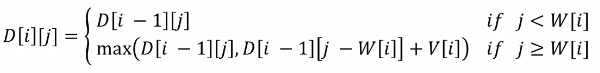

In [24]:
n, k = map(int, input().split(' '))

dp = [[0]*(k+1) for _ in range(n+1)]

for i in range(1, n+1):
    weight, value = map(int, input().split(' '))
    for j in range(1, k+1):
        if j<weight:
            dp[i][j] = dp[i-1][j]
        else:
            dp[i][j] = max(dp[i-1][j], dp[i-1][j-weight]+value)
            
print(dp[n][k])

4 7
6 13
4 8
3 6
5 12
14


In [25]:
dp

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 13, 13],
 [0, 0, 0, 0, 8, 8, 13, 13],
 [0, 0, 0, 6, 8, 8, 13, 14],
 [0, 0, 0, 6, 8, 12, 13, 14]]

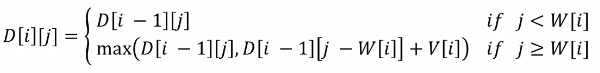

핵심은 이 테이블 그리는걸 이해하는거 같다. 

일단 테이블 만들때 

받은 요소 K를 기준으로 for를 도는거임.

테이블의 컬럼은 총 무게 제한. 로우는 요소를 돌때마다 업데이트되는거.

지금 아래는 처음 0만 있던 거에서 4번 업데이트되서 총 5줄이다.

요소 K개중 한 요소를 검사할때 

우선 그 요소의 무게를 보고 컬럼에 못들어가면 ( if j < W[i] )<br>
그냥 윗줄을 그대로 내림 ( D[i-1][j] )

그 요소의 무게를 보고 컬럼에 들어갈 수 있으면,  ( if j >= W[i] )<br>
여기서 두가지로 갈림. <br>
1. 들어갈 수 있지만 안 넣고 기존걸 쓰는거 ( D[i-1][j] )
2. 들어가되, 현재 요소의 무게가 w, 가치가 v이고, 컬럼의 무게제한이 k면, 무게제한 k-w에 있는 가치에 현재 요소의 가치 v를 더한것

이 둘중 큰거 가져다 쓰면 됨

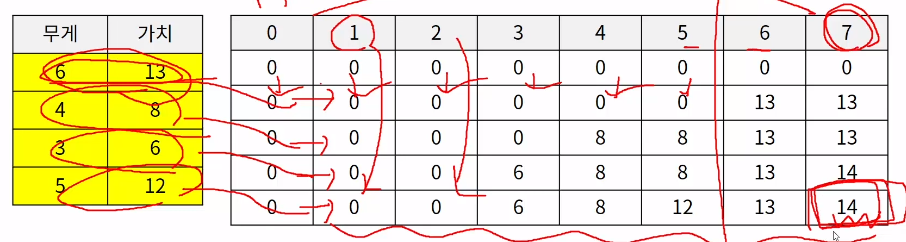

예를들어, 무게제한 7짜리에서, 2번째 줄에 있다가 무게 3, 가치 6짜리 요소를 검사하고 3번째 줄로 넘어간 시점을 보자.

무게제한 7의 현재 가치는 무게 6짜리가 들어온 13임.

일단 검사하는 요소는 무게가 3이기 때문에 무게제한 7에 들어올 수 있음.

여기서

1. 들어올수 있지만 그냥 이전 무게인 13을 쓰는경우 => 13
2. 무게제한 7에서 현재 검사하는 요소의 무게인 3을 뺀 무게제한 4의 가치(8)에 검사하는 요소의 가치(6)을 더한 것 => 14

둘중에 14가 크니까 14를 쓰는거임.

In [82]:
# acmicpc.net/problem/11053

# 가장 긴 증가하는 부분 수열 LIS라고 불리는 문제.

n = int(input())

array = list(map(int, input().split(' ')))

6
1 2 1 4 3 4


In [83]:
table = [[[0,0] for i in range(n)] for j in range(n+1)]

In [84]:
for i in range(n):
    num = array[i]
    array_before = table[i]
    array_now = table[i+1]
    for j in range(0, i+1):
        if array_before[j][1]<num:
            array_now[j][1]=num
            array_now[j][0]=array_before[j][0]+1
        else:
            array_now[j][1]=array_before[j][1]
            array_now[j][0]=array_before[j][0]

In [85]:
table

[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
 [[1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
 [[2, 2], [1, 2], [0, 0], [0, 0], [0, 0], [0, 0]],
 [[2, 2], [1, 2], [1, 1], [0, 0], [0, 0], [0, 0]],
 [[3, 4], [2, 4], [2, 4], [1, 4], [0, 0], [0, 0]],
 [[3, 4], [2, 4], [2, 4], [1, 4], [1, 3], [0, 0]],
 [[3, 4], [2, 4], [2, 4], [1, 4], [2, 4], [1, 4]]]

In [86]:
table[-1]

[[3, 4], [2, 4], [2, 4], [1, 4], [2, 4], [1, 4]]

In [87]:
max(table[-1], key = (lambda i: i[0]))[0]

3

In [88]:
# 현재 반례 : 
# 6
# 1 2 1 4 3 4

# 답 : 4
# 내 풀이 : 3

In [90]:
# 선생님

# 이 문제도 동적 프로그래밍의 전형임.

# 이것도 꼭 알아둬야 함.

# 동적 프로그램을 써서 O(N^2) 으로 풀 수 있음

# D[i] = array[i] 를 마지막 원소로 가지는 부분 수열의 최대 길이

# 모든 0<=j<i 에 대해, D[i] = max(D[i], D[j]+1) if array[j]<array[i]

# 음 약간 풀이 구조가 다르네. 음.. 이건 논리적으로도 쉬운거네

# 뒤에 값을 끌어오는 방식을 썼어야 되는데 괜히 이중배열로 최댓값을 저장해서 틀림.

n = int(input())

array = list(map(int, input().split(' ')))

dp = [1]*n

for i in range(1,n):
    for j in range(0, i):
        if array[j] < array[i]:
            dp[i] = max(dp[i], dp[j]+1)
            
print(max(dp))


6
1 2 1 4 3 4
4


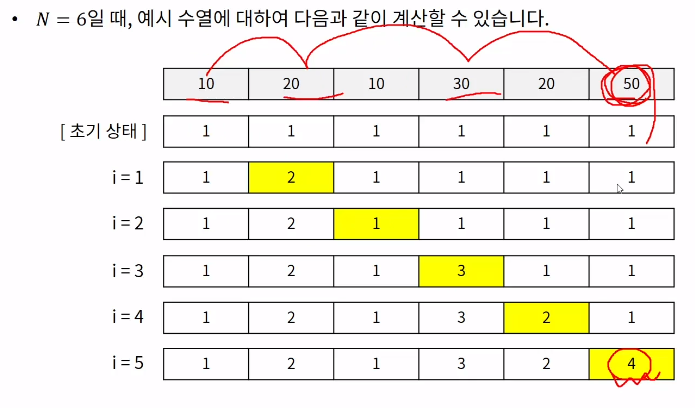